In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    'EID':[101,102,103],
    'Name':['Ram','Shyam','Hari'],
    'Level':['Junior','Senior','Mid']
})
df.head()


,EID,Name,Level
0,101,Ram,Junior
1,102,Shyam,Senior
2,103,Hari,Mid


In [3]:
df['Level'] = df['Level'].astype('category')
df

,EID,Name,Level
0,101,Ram,Junior
1,102,Shyam,Senior
2,103,Hari,Mid


In [4]:
type(df["Level"])

pandas.core.series.Series

In [5]:
df["Level"] = df["Level"].cat.rename_categories({
    "Junior":"Jr",
    "Senior":"Sr"
})

In [6]:
df

,EID,Name,Level
0,101,Ram,Jr
1,102,Shyam,Sr
2,103,Hari,Mid


In [7]:
df["Level_code"] = df["Level"].cat.codes
df.head()

,EID,Name,Level,Level_code
0,101,Ram,Jr,0
1,102,Shyam,Sr,2
2,103,Hari,Mid,1


In [8]:
# get_dummies in pandas 
encoded = pd.get_dummies(df["Level"] , prefix="Lev" , dtype=int)
encoded

,Lev_Jr,Lev_Mid,Lev_Sr
0,1,0,0
1,0,0,1
2,0,1,0


In [9]:
df_final = pd.concat([df,encoded],axis=1)
df_final

,EID,Name,Level,Level_code,Lev_Jr,Lev_Mid,Lev_Sr
0,101,Ram,Jr,0,1,0,0
1,102,Shyam,Sr,2,0,0,1
2,103,Hari,Mid,1,0,1,0


# Handling time series data 

In [10]:
df = pd.DataFrame({
    'Date':['2024-01-01','2024-02-03','2024-02-08','2024-04-25'],
    "Sales":[101,110,120,111]
})
df.head()

,Date,Sales
0,2024-01-01,101
1,2024-02-03,110
2,2024-02-08,120
3,2024-04-25,111


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4 non-null      object
 1   Sales   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4 non-null      datetime64[ns]
 1   Sales   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


In [13]:
df.head()

,Date,Sales
0,2024-01-01,101
1,2024-02-03,110
2,2024-02-08,120
3,2024-04-25,111


In [14]:
df = df.set_index("Date")
df

,Sales
Date,
2024-01-01,101
2024-02-03,110
2024-02-08,120
2024-04-25,111


In [15]:
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Day"] = df.index.day
df["Month_Name"] = df.index.month_name()
df["Day_Name"] = df.index.day_name()


In [16]:
df

,Sales,Year,Month,Day,Month_Name,Day_Name
Date,,,,,,
2024-01-01,101,2024,1,1,January,Monday
2024-02-03,110,2024,2,3,February,Saturday
2024-02-08,120,2024,2,8,February,Thursday
2024-04-25,111,2024,4,25,April,Thursday


In [17]:
df.loc['2024-01-01':'2024-02-28']

,Sales,Year,Month,Day,Month_Name,Day_Name
Date,,,,,,
2024-01-01,101,2024,1,1,January,Monday
2024-02-03,110,2024,2,3,February,Saturday
2024-02-08,120,2024,2,8,February,Thursday


In [18]:
df

,Sales,Year,Month,Day,Month_Name,Day_Name
Date,,,,,,
2024-01-01,101,2024,1,1,January,Monday
2024-02-03,110,2024,2,3,February,Saturday
2024-02-08,120,2024,2,8,February,Thursday
2024-04-25,111,2024,4,25,April,Thursday


<Axes: xlabel='Year'>

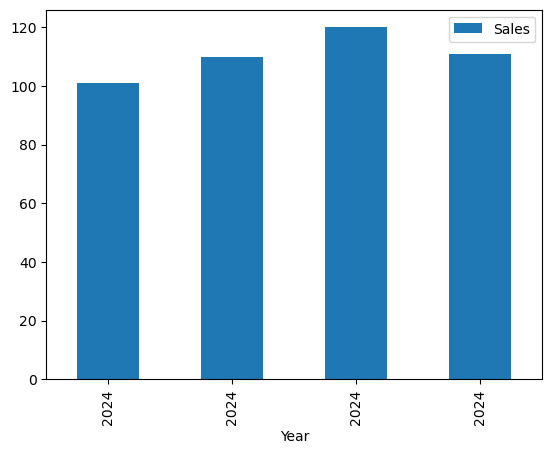

In [19]:
df.plot.bar(x="Year",y="Sales")


In [20]:
df.to_csv("date.csv")

In [21]:
new_df = pd.read_csv("date.csv",parse_dates=['Date'], index_col="Date")
new_df.head()

,Sales,Year,Month,Day,Month_Name,Day_Name
Date,,,,,,
2024-01-01,101,2024,1,1,January,Monday
2024-02-03,110,2024,2,3,February,Saturday
2024-02-08,120,2024,2,8,February,Thursday
2024-04-25,111,2024,4,25,April,Thursday


# Feature transformation , scaling and Encoding 

# Feature Transformation 

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [23]:
x= pd.Series([0,1,10,100,1000])
x_log = np.log1p(x)
print(x_log)
# type(x_log)

0    0.000000
1    0.693147
2    2.397895
3    4.615121
4    6.908755
dtype: float64


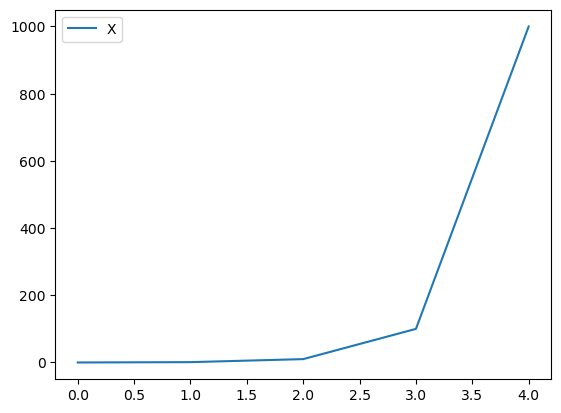

In [24]:
plt.plot(x , label ="X")
plt.legend()
plt.show()


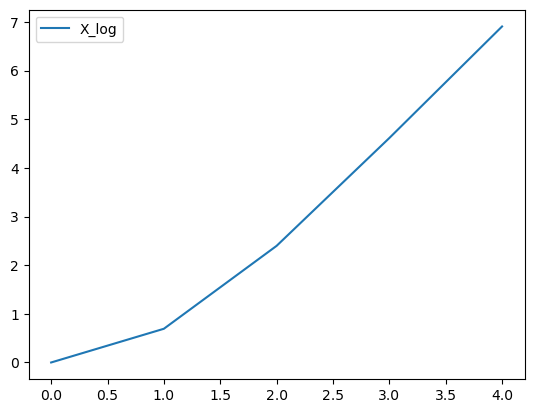

In [25]:
plt.plot(x_log , label = "X_log")
plt.legend()
plt.show()

# min - max scaling


In [33]:
from sklearn.preprocessing import MinMaxScaler

X =[[10],[200],[800],[90],[1000]]
X = np.array(X)
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(X)
scaled_data



array([[-1.        ],
       [-0.61616162],
       [ 0.5959596 ],
       [-0.83838384],
       [ 1.        ]])

In [34]:
# same flr standard scaler 
from sklearn.preprocessing import StandardScaler

X =[[10],[200],[800],[90],[1000]]
X = np.array(X)
scaler =StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data


array([[-1.02105106],
       [-0.54788106],
       [ 0.94634001],
       [-0.82182159],
       [ 1.4444137 ]])

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cities = ['Kathmandu','Pokhara','Biratnagar']
scaled_data = le.fit_transform(cities)
scaled_data

array([1, 2, 0])